In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu = [
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [
    
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

samples_bkg = [
    "TTJets",
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", location_cfg="signal_v6.yaml")
fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", location_cfg="signal_v6.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", location_cfg="backgrounds.yaml")

fileset_4mu['TTJets'] = fileset_bkg['TTJets']
fileset_2mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)
output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]
out_2mu = output_2mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Output()

Output()

In [5]:
samples_4mu = [
    "TTJets",
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [
    "TTJets",
    
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

(0.1, 100000)

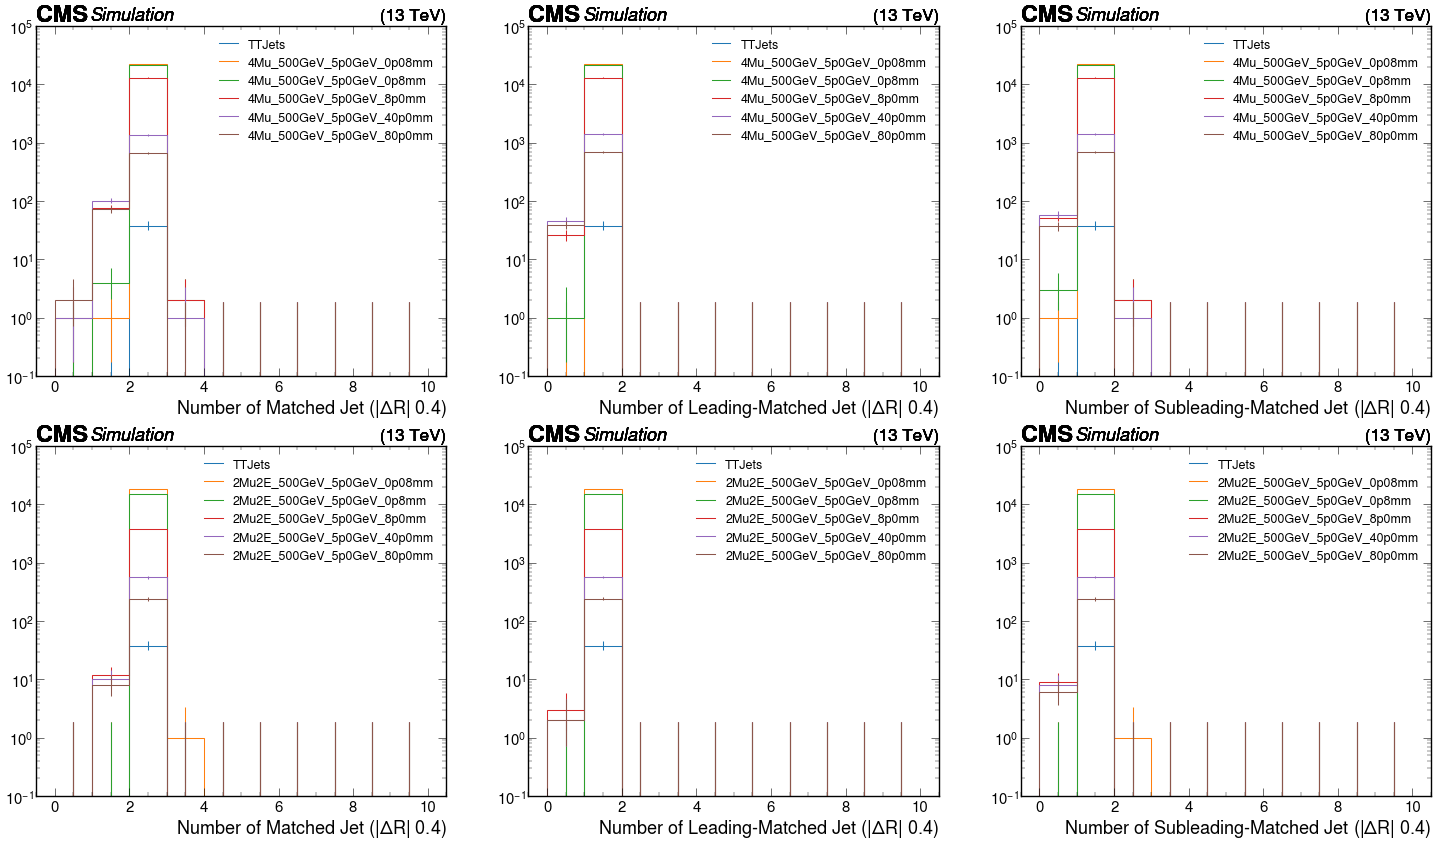

In [15]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

(0.1, 100000)

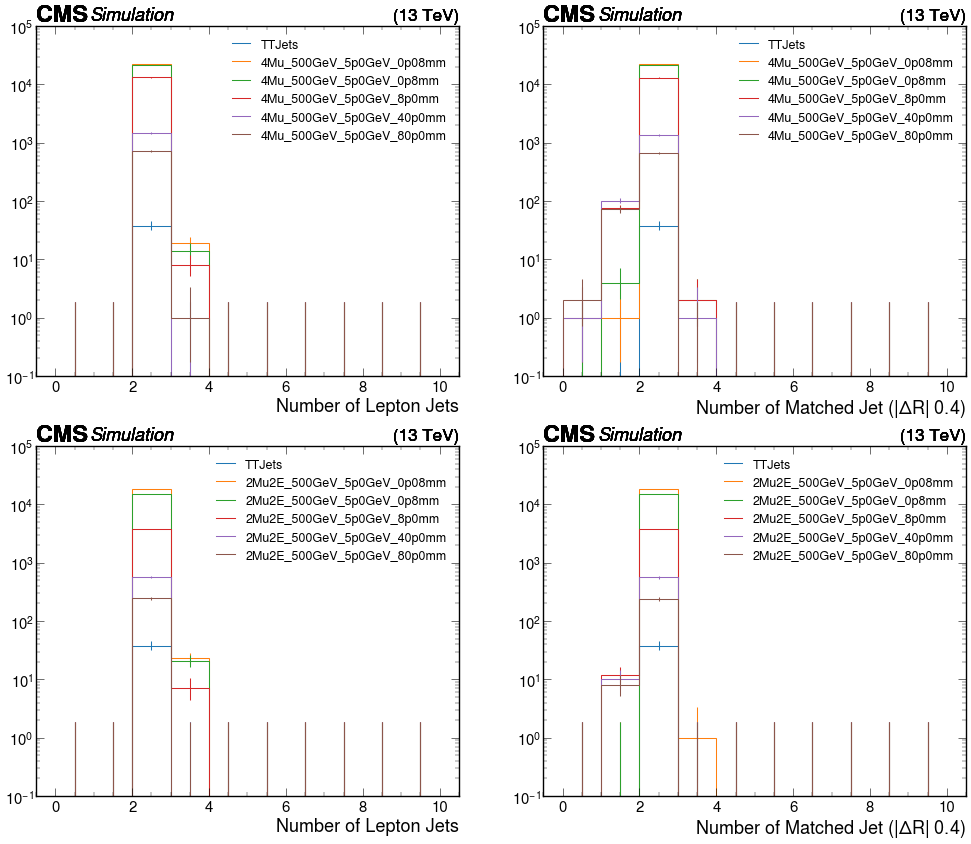

In [16]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

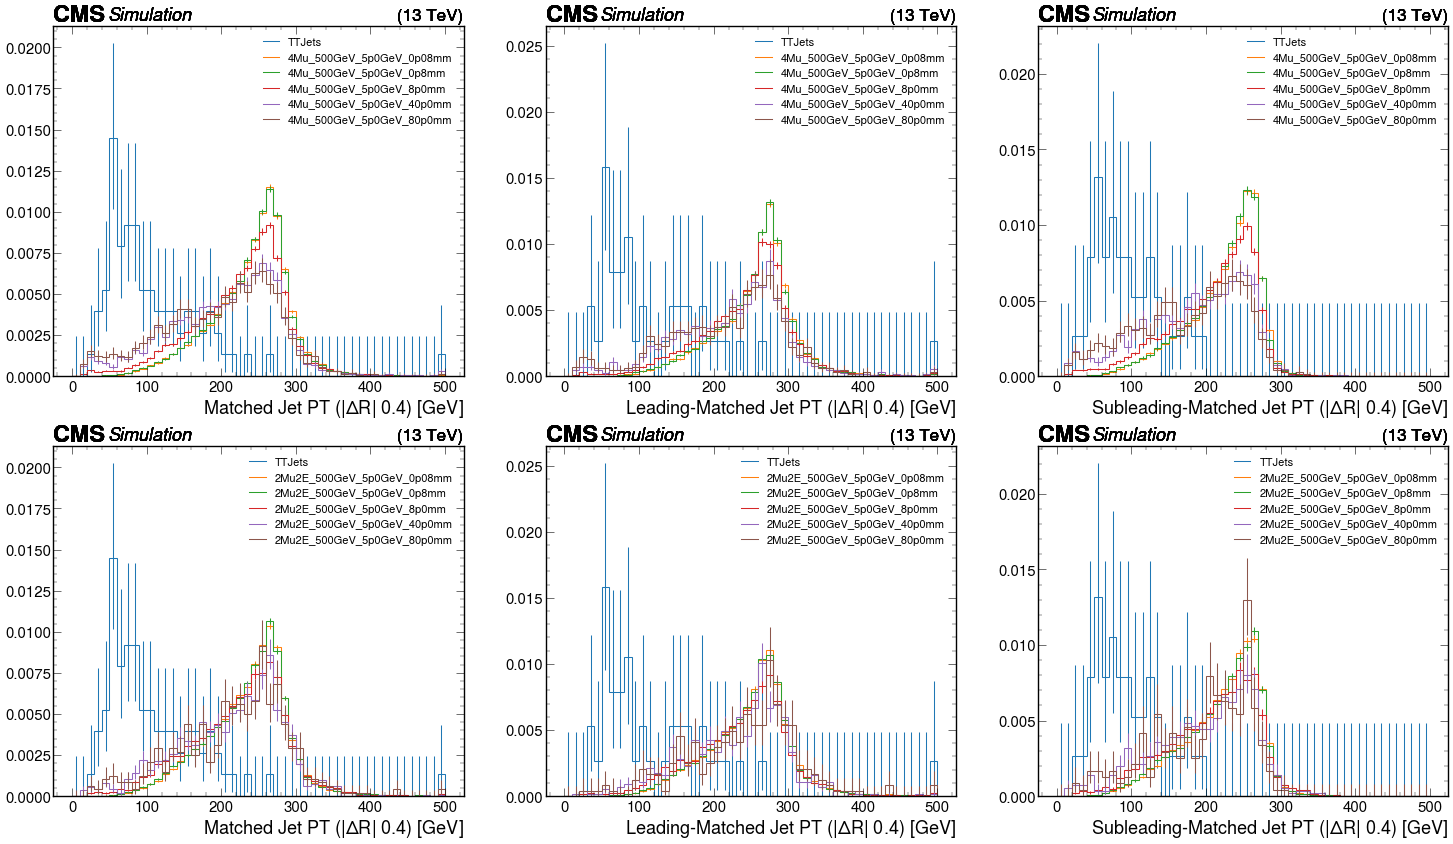

In [17]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

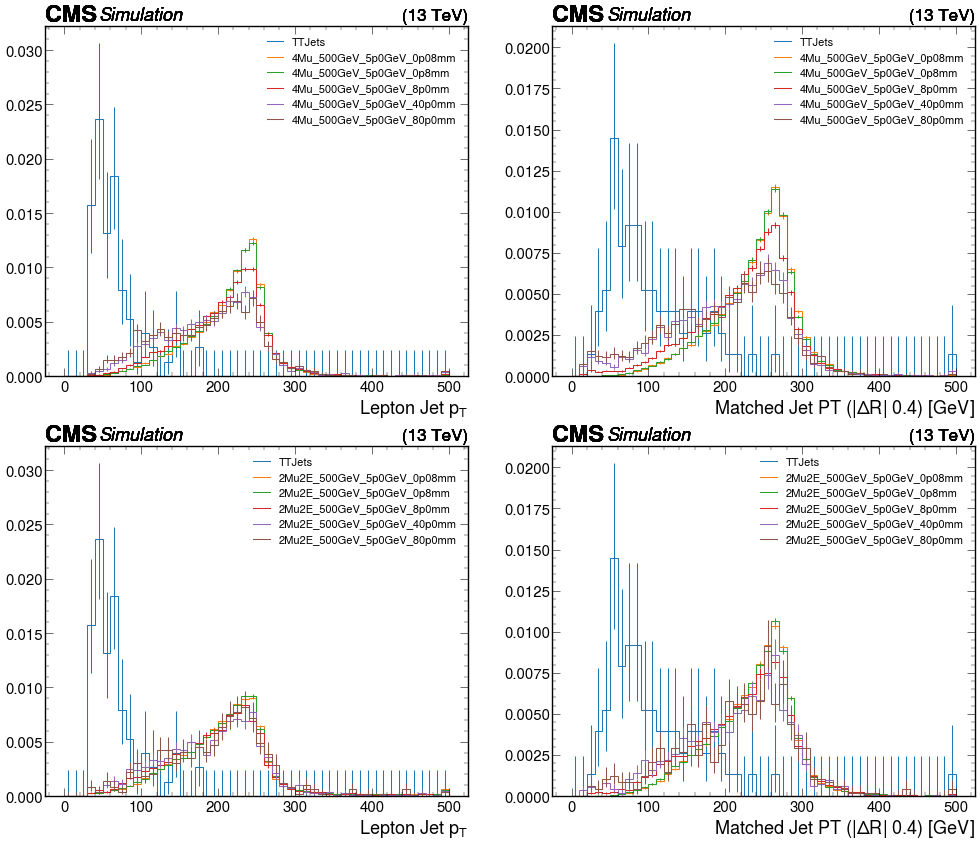

In [18]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

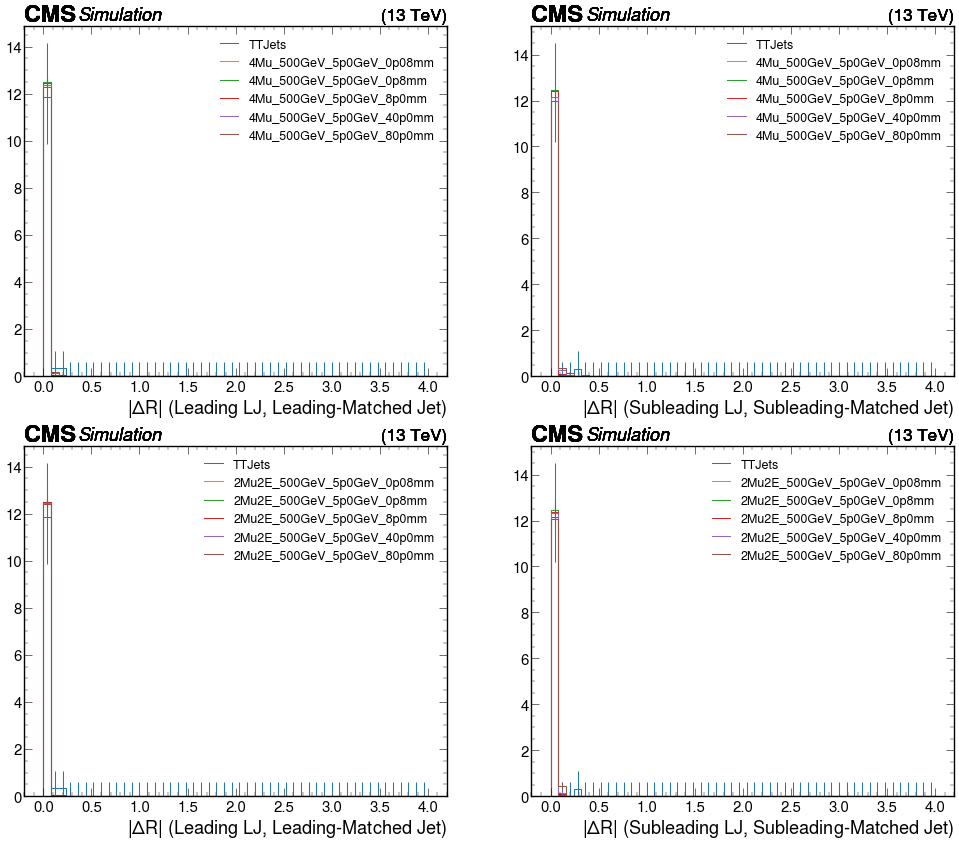

In [19]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leadingLJ_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleadingLJ_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leadingLJ_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleadingLJ_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 18})

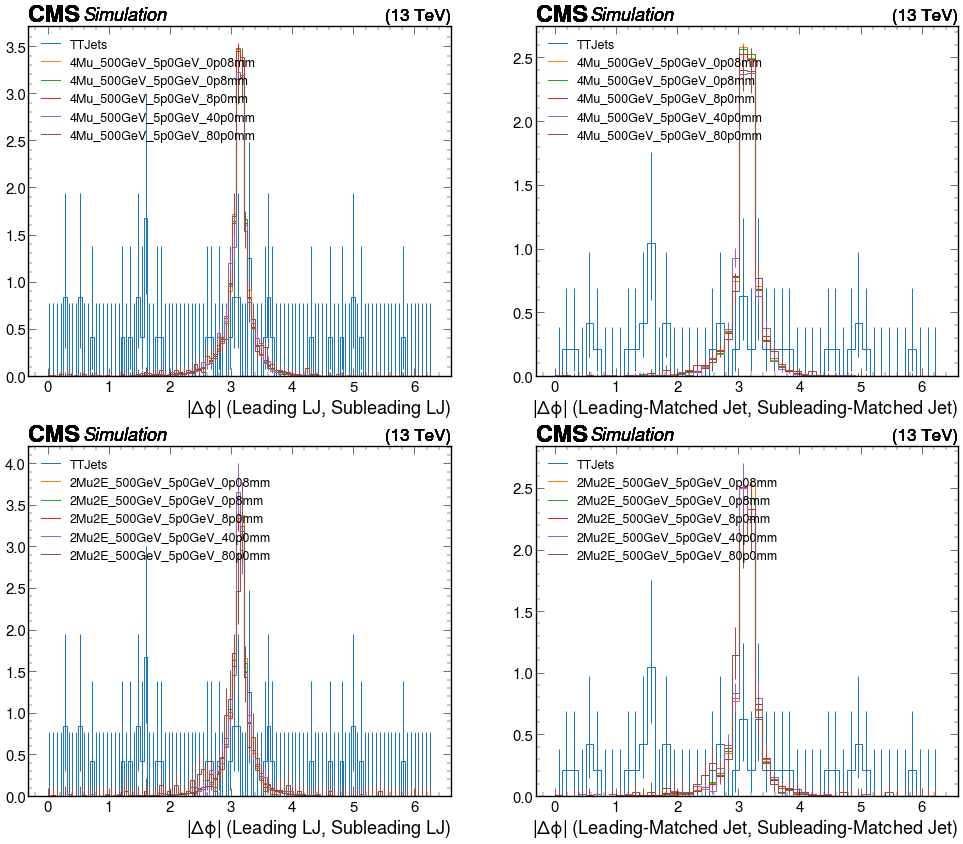

In [26]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_lj_absdphi"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_absdphi"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_lj_absdphi"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjet_matchedjet_absdphi"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 18})

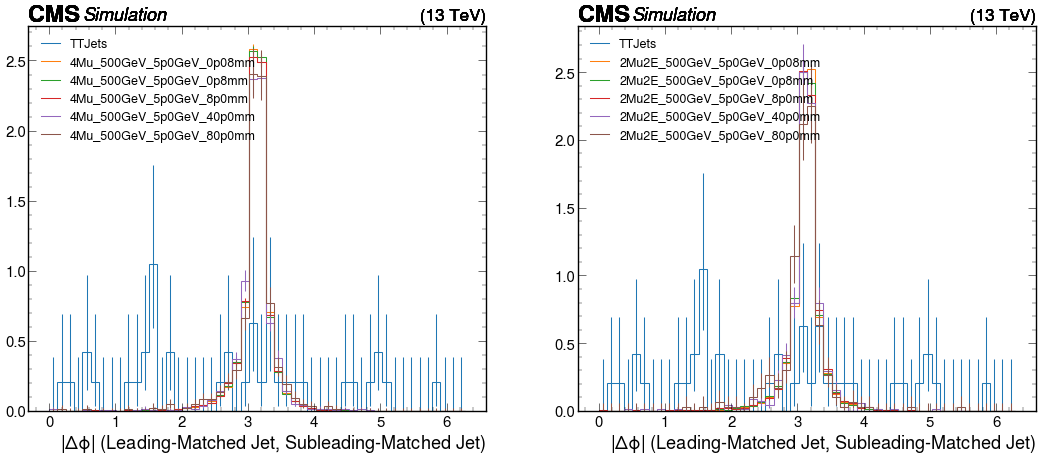

In [21]:
plt.subplots(1,2,figsize=(26,10))

plt.subplot(1,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_absdphi"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(1,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjet_matchedjet_absdphi"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 18})

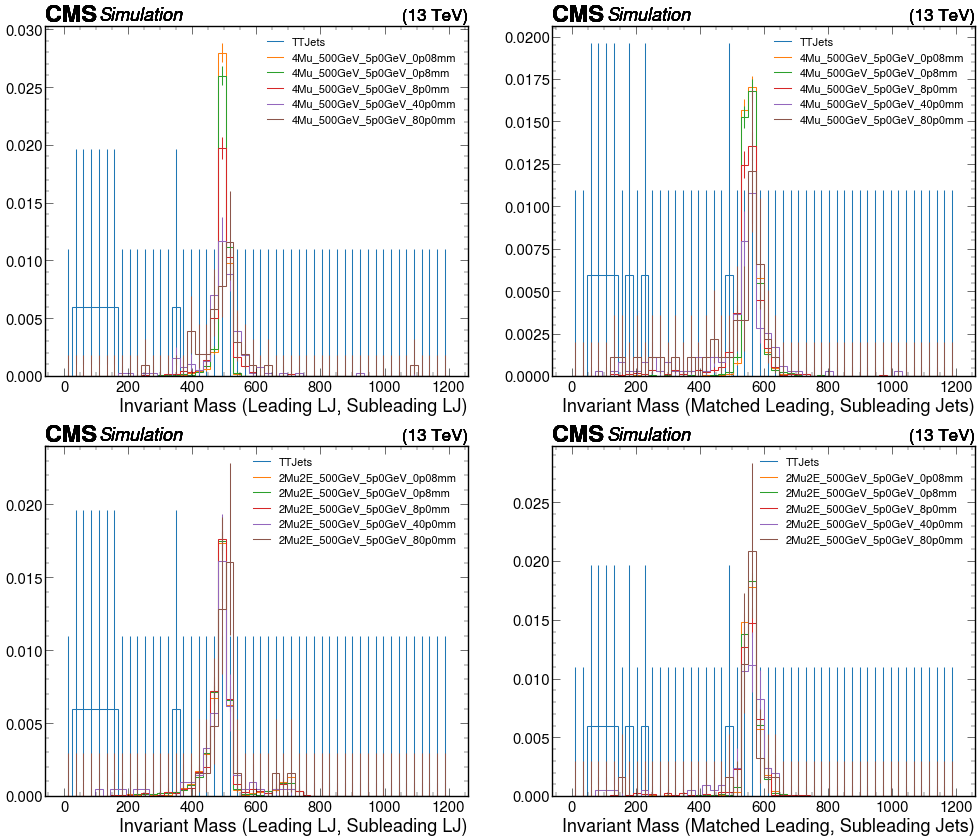

In [14]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

(0.1, 100000)

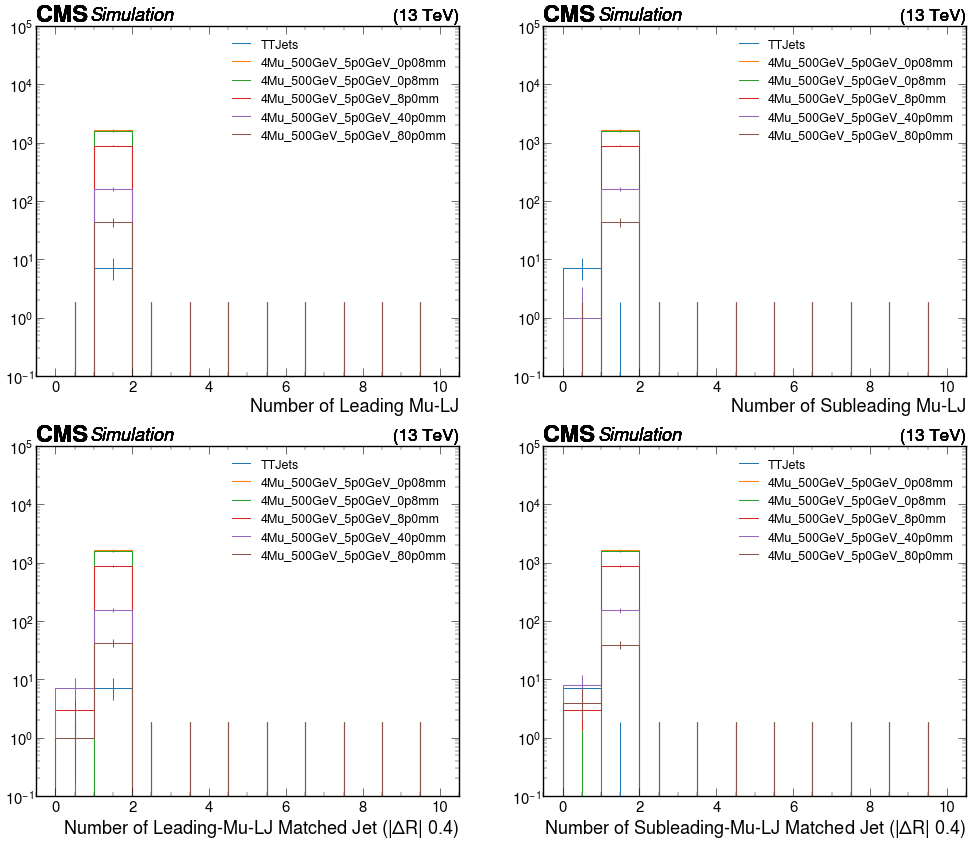

In [15]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_lj_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_lj_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

(0.1, 100000)

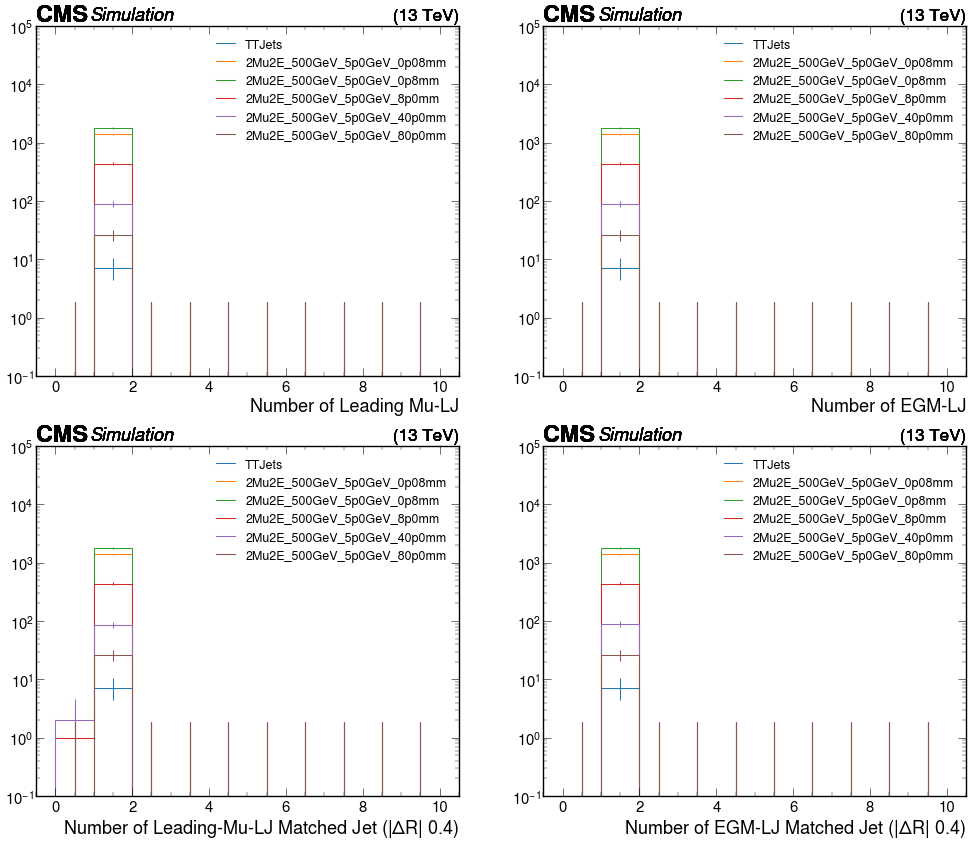

In [16]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_lj_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_egm_lj_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matched_jets_n"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 18})
plt.yscale('log')
plt.ylim(0.1,100000)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


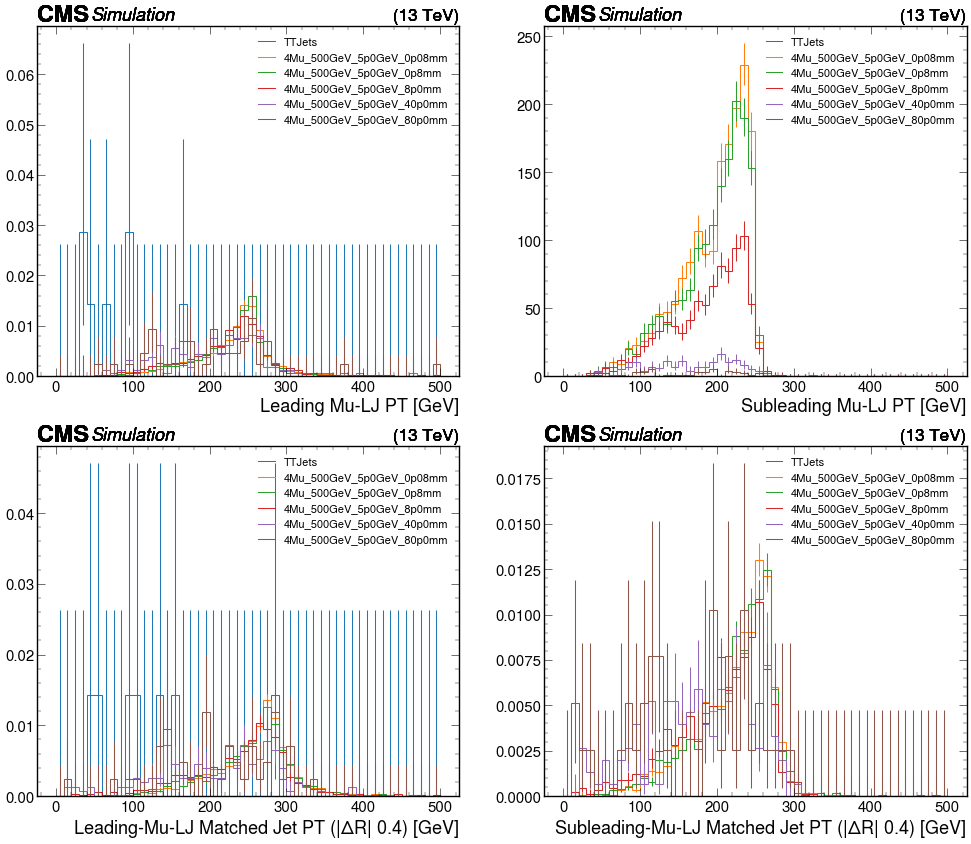

In [17]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_lj_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_lj_pt"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

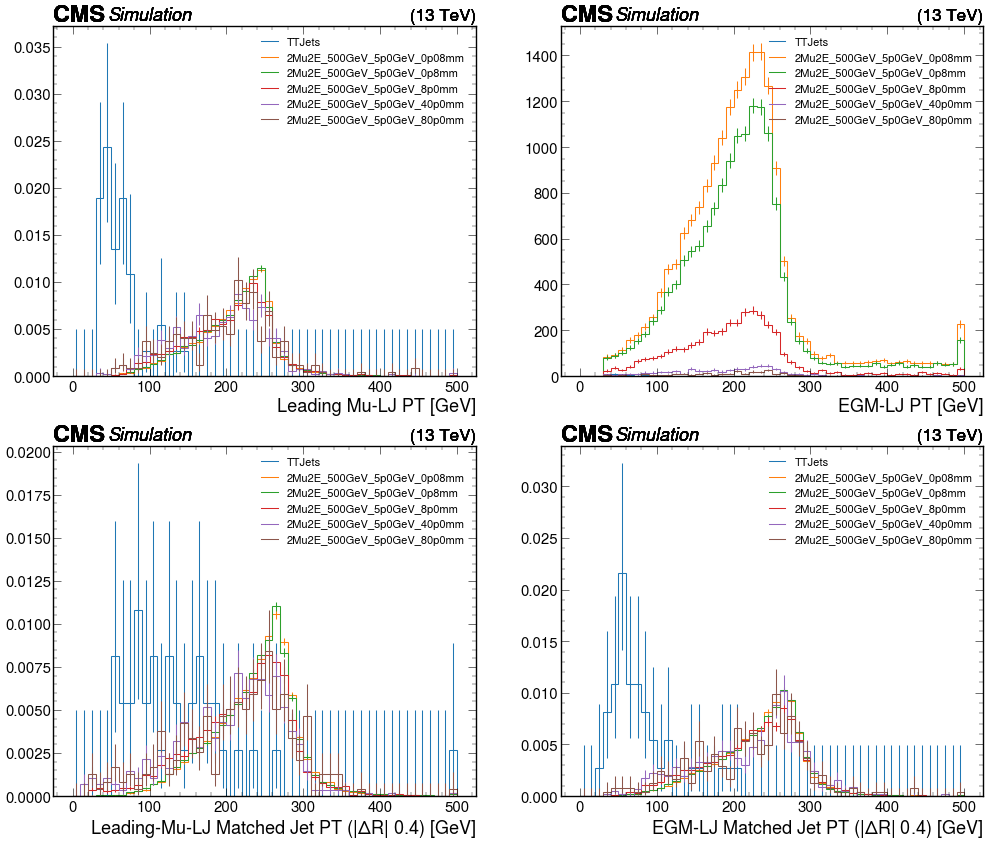

In [28]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_lj_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_egm_lj_pt"][channels[0], :], density=False)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matched_jets_pt"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

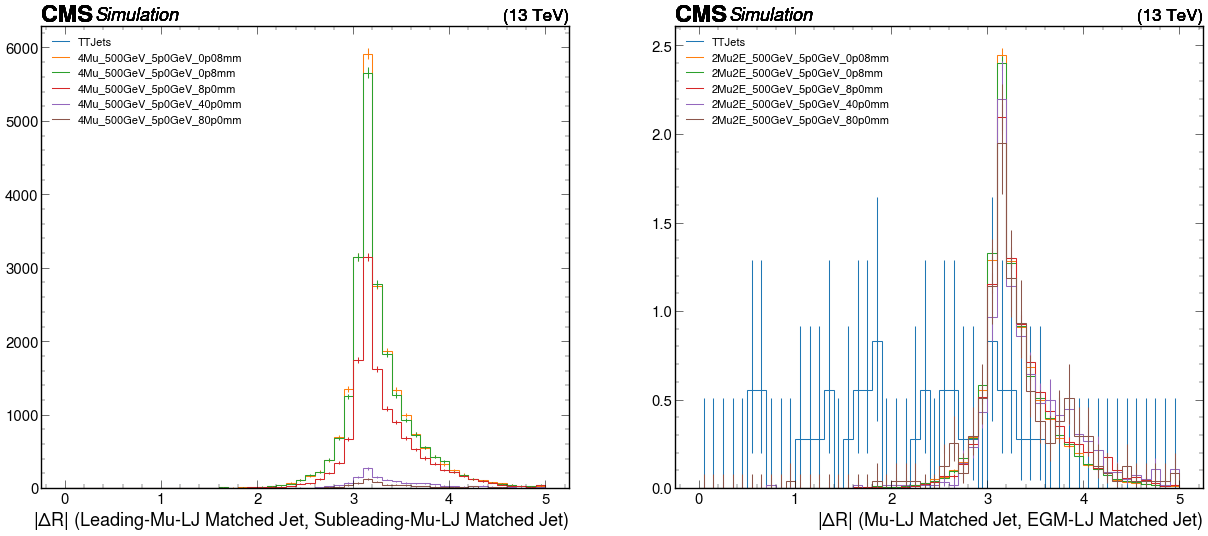

In [31]:
plt.subplots(1,2,figsize=(30,12))

plt.subplot(1,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_absdR"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(1,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["mu_matchedjet_egm_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

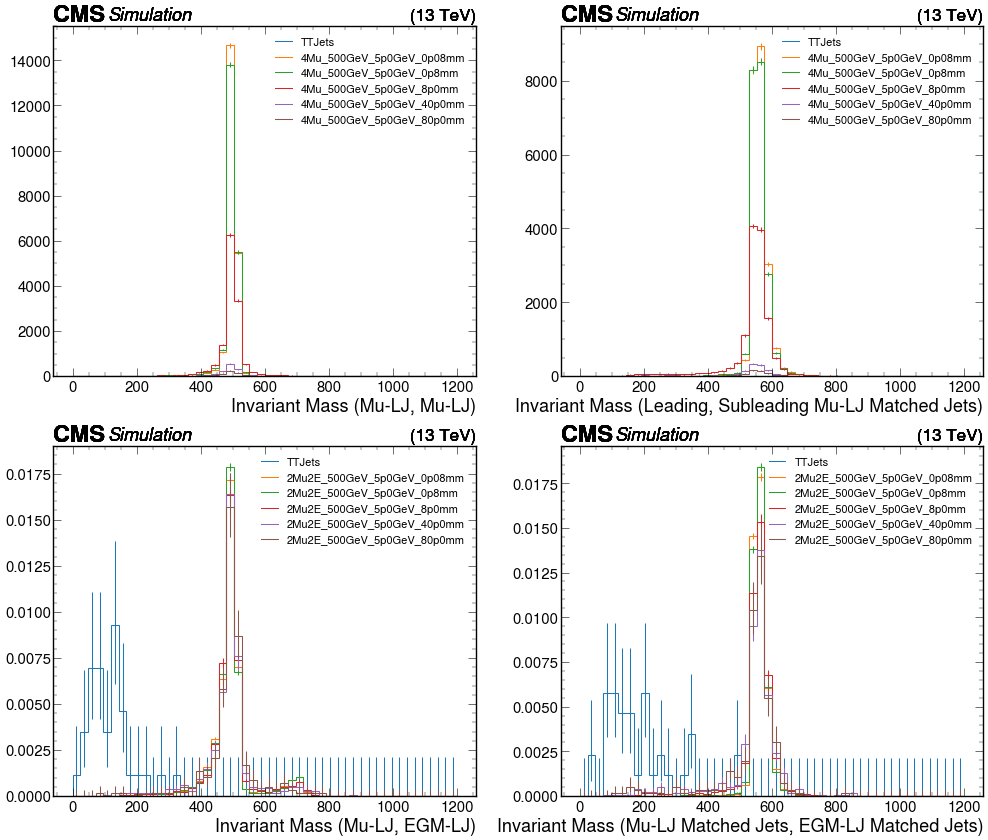

In [35]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["mu_lj_mu_lj_invmass"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_invmass"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["mu_lj_egm_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["mu_matchedjet_egm_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

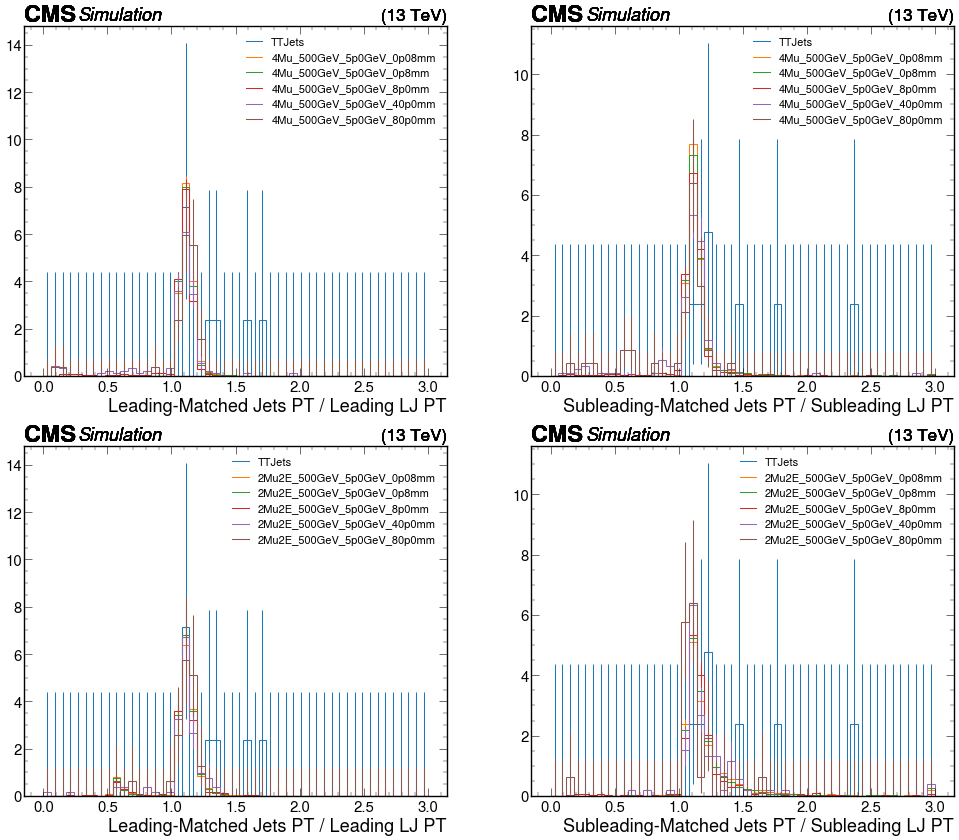

In [24]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


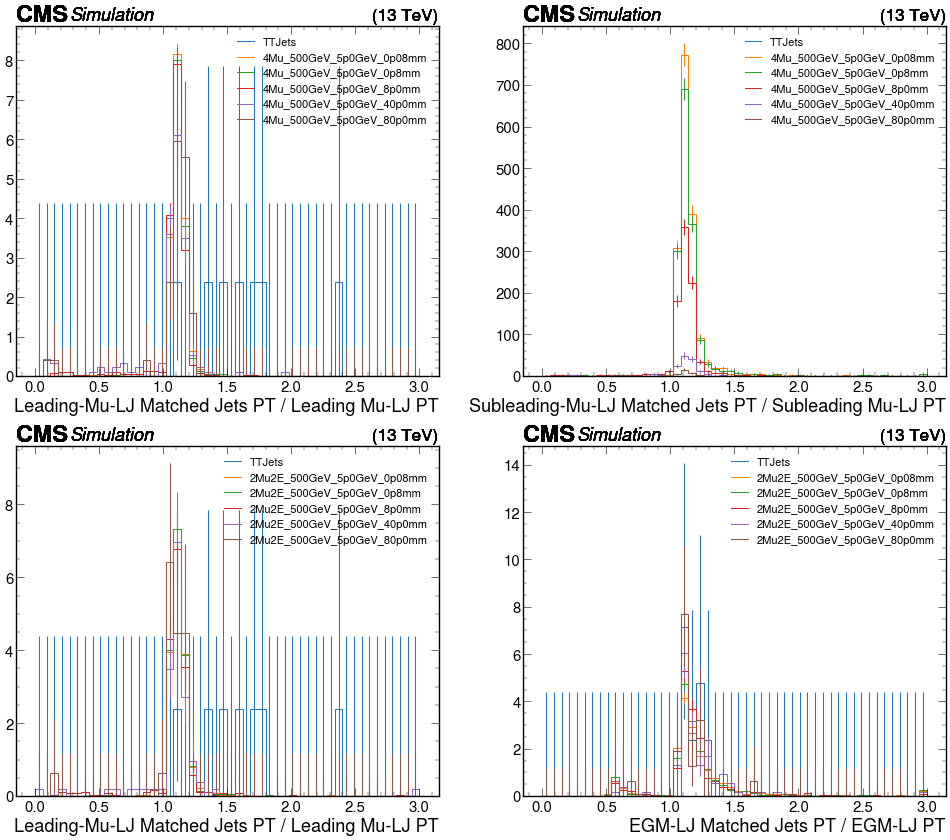

In [25]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

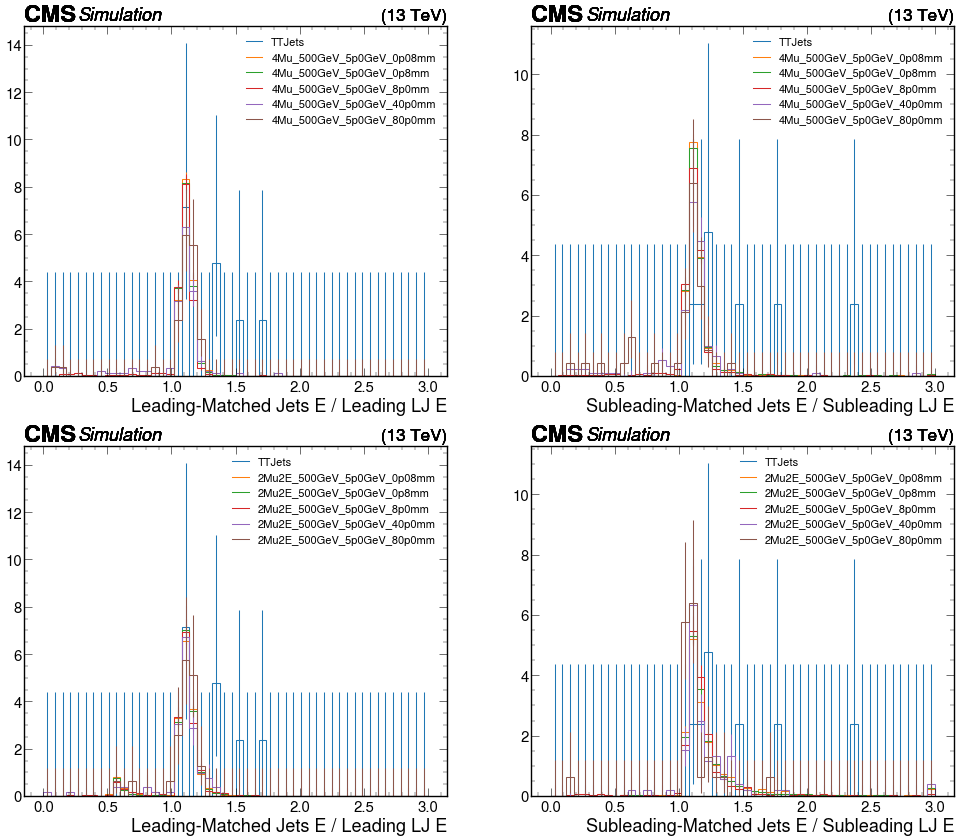

In [26]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


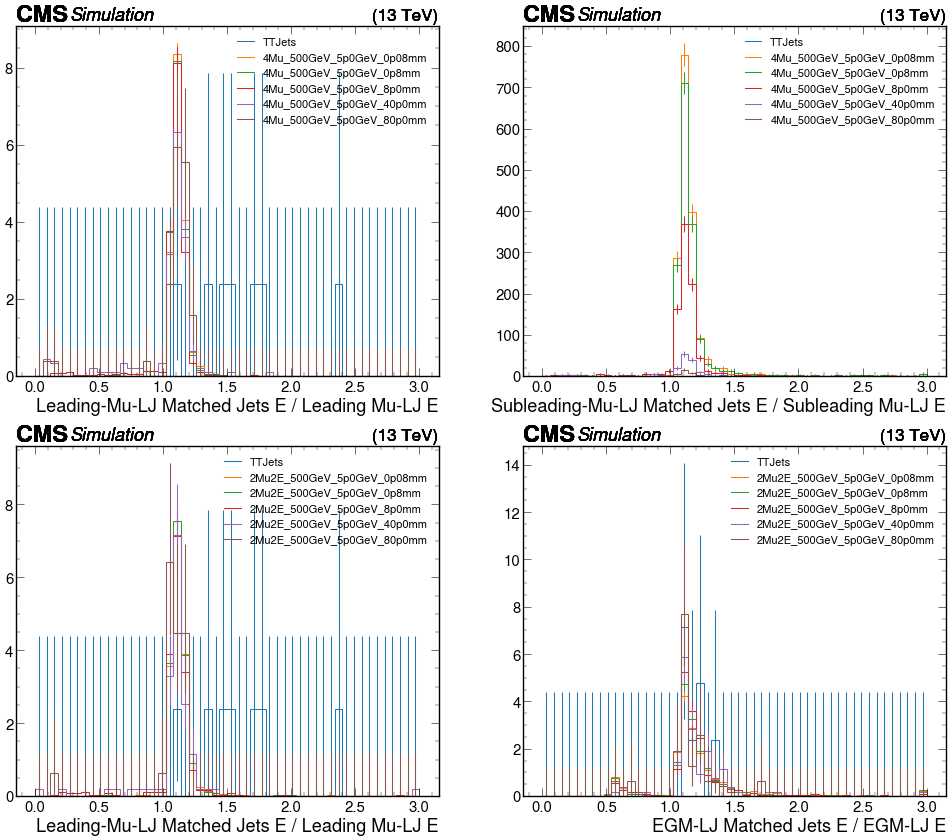

In [27]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matchedjet_lj_ERatio"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

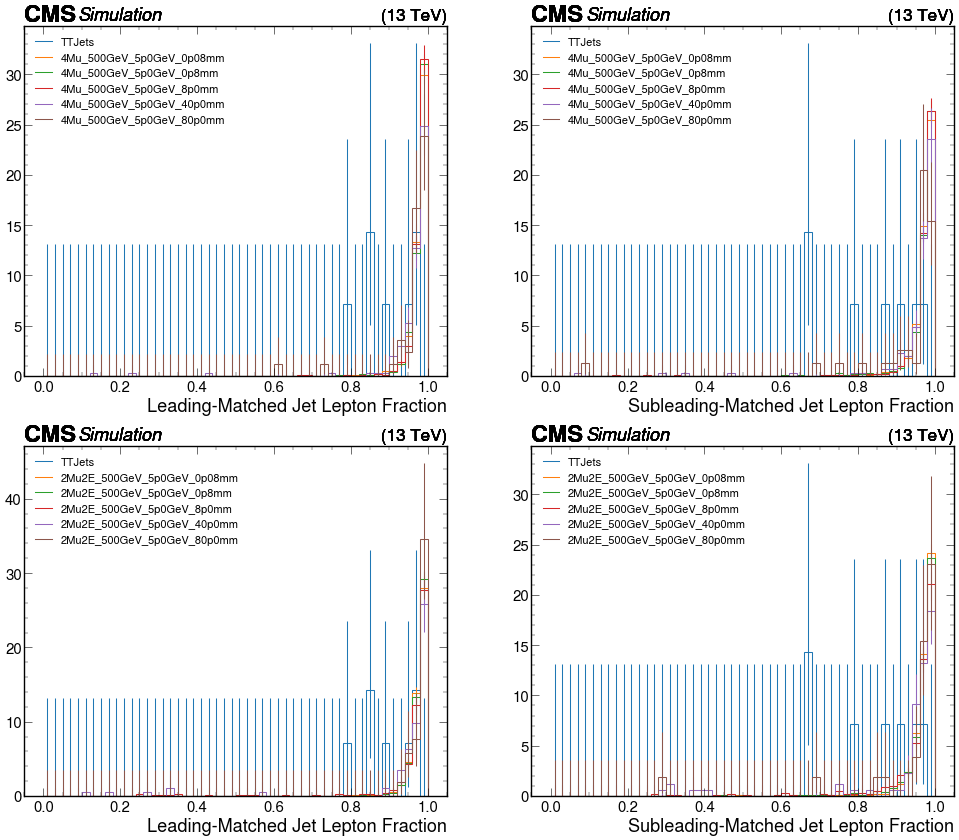

In [28]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


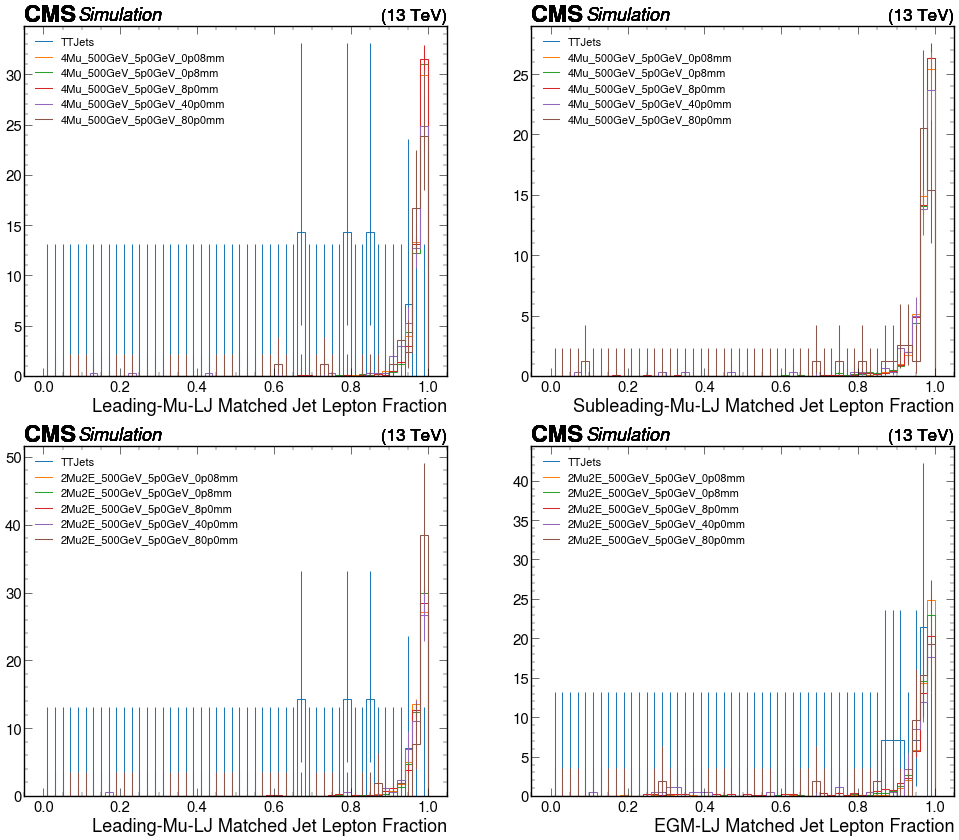

In [29]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

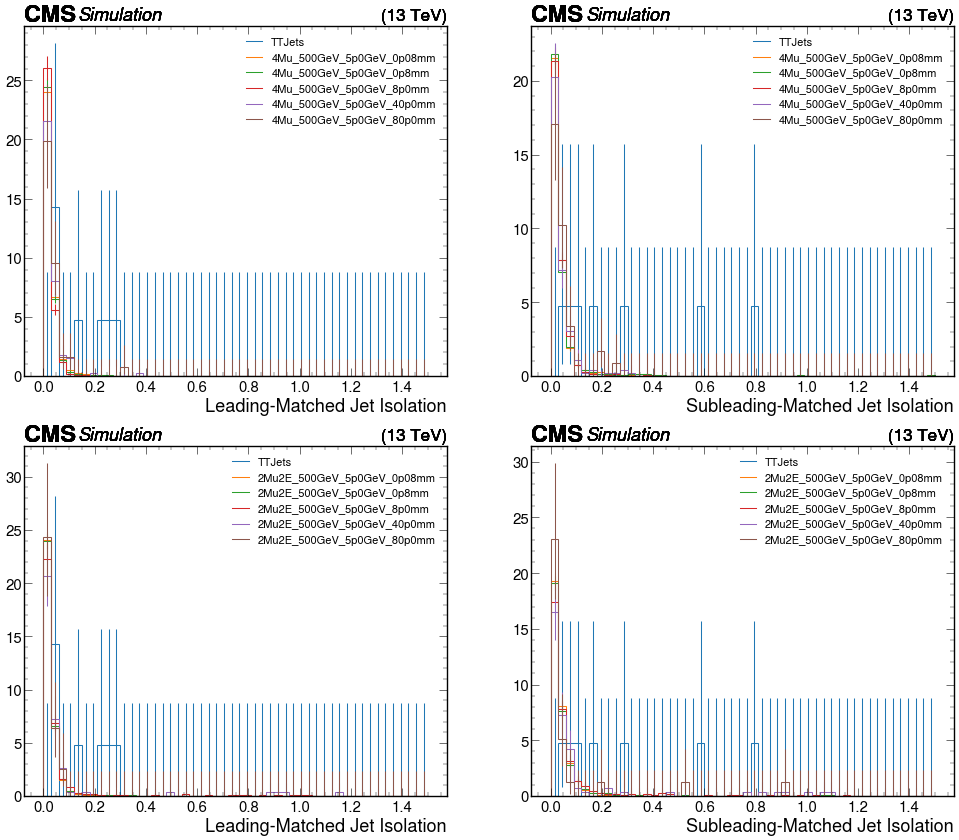

In [22]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

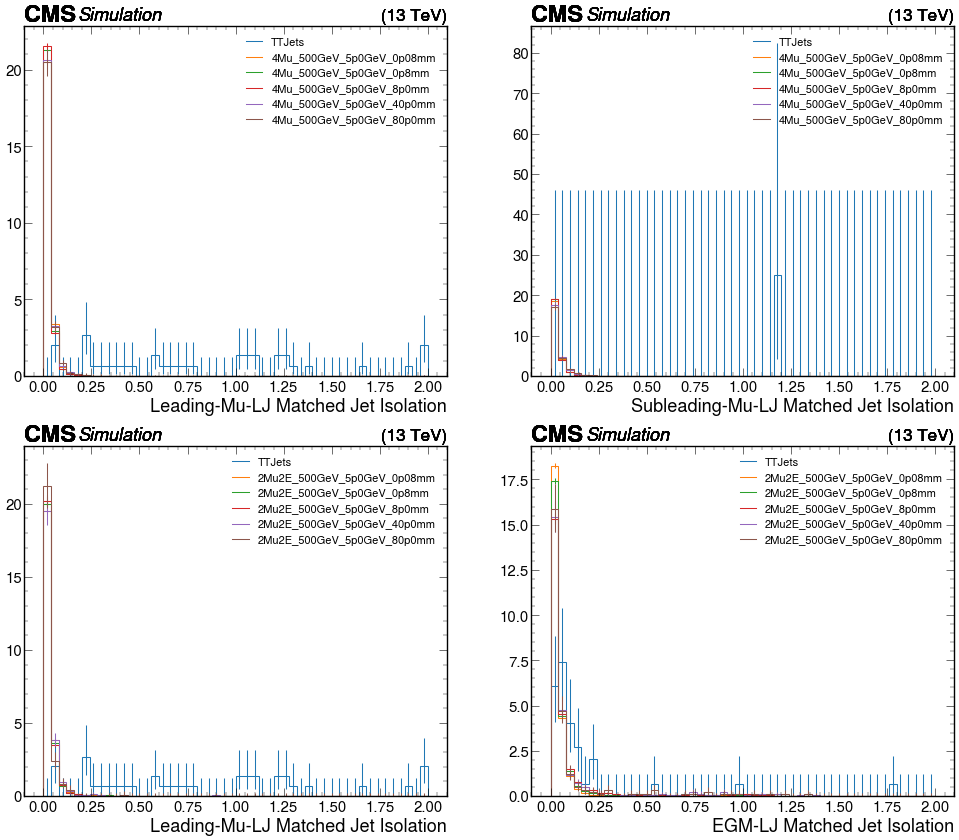

In [36]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

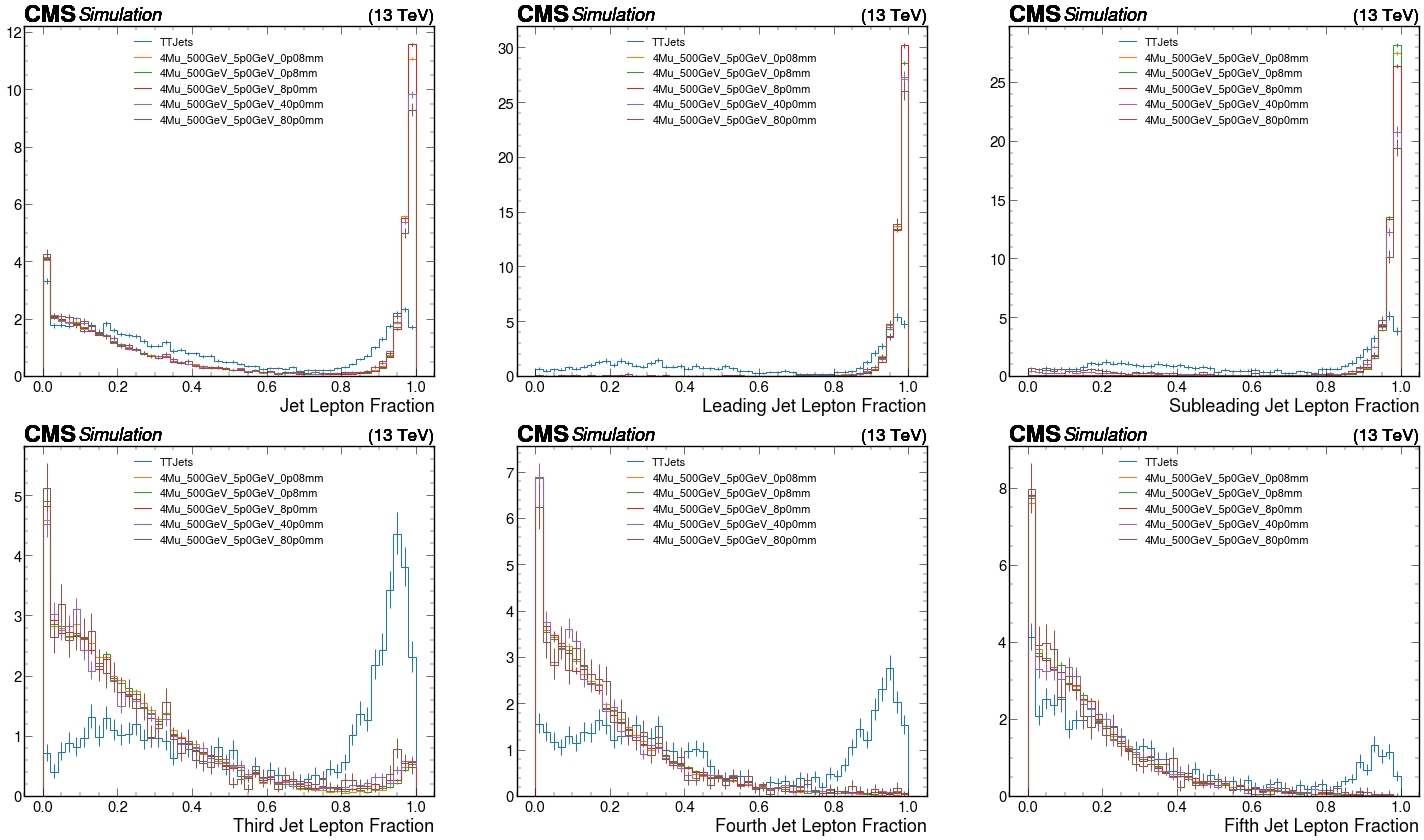

In [22]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet3_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet4_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet5_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=9, prop={'size': 16})

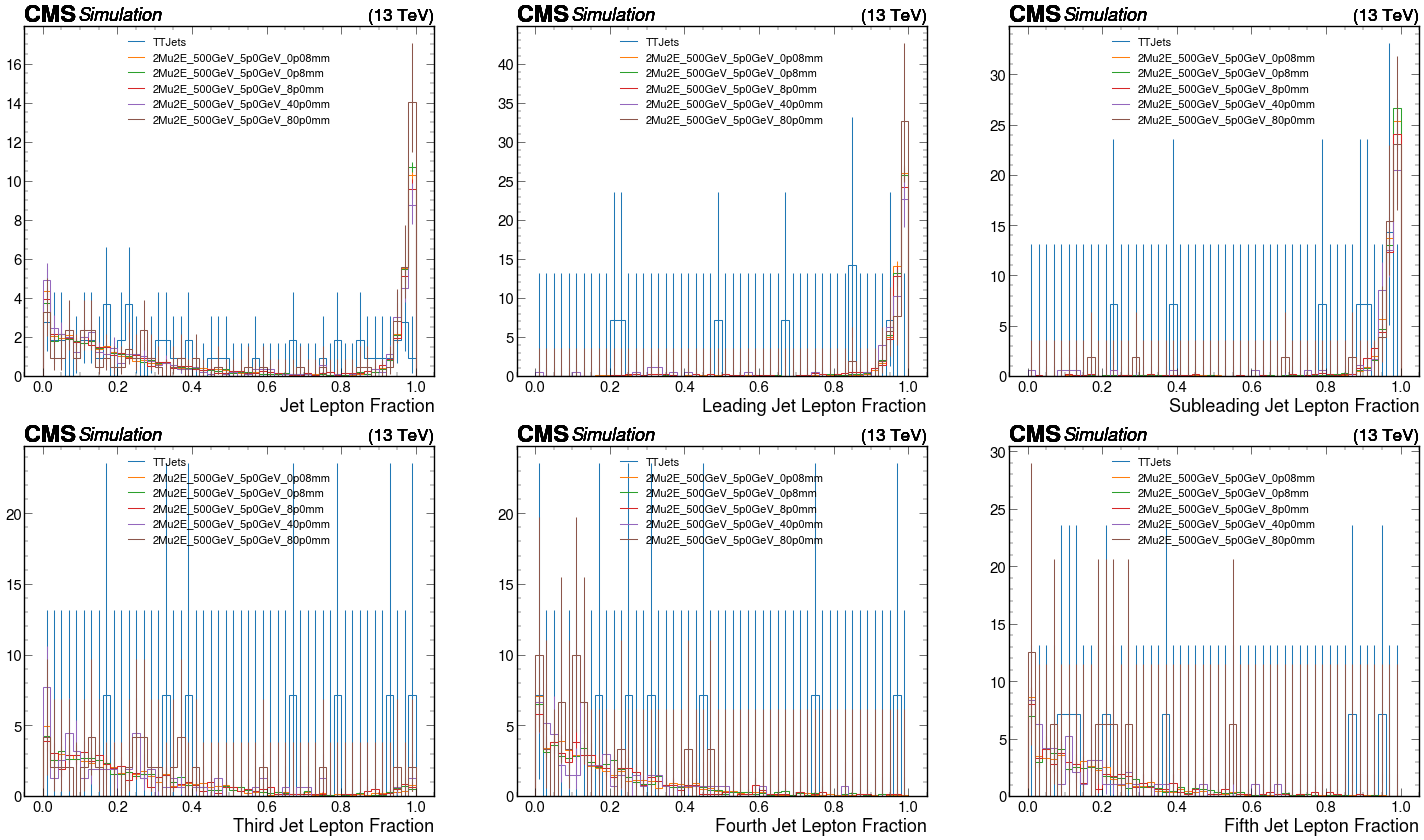

In [24]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet1_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet2_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet3_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet4_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet5_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=9, prop={'size': 16})

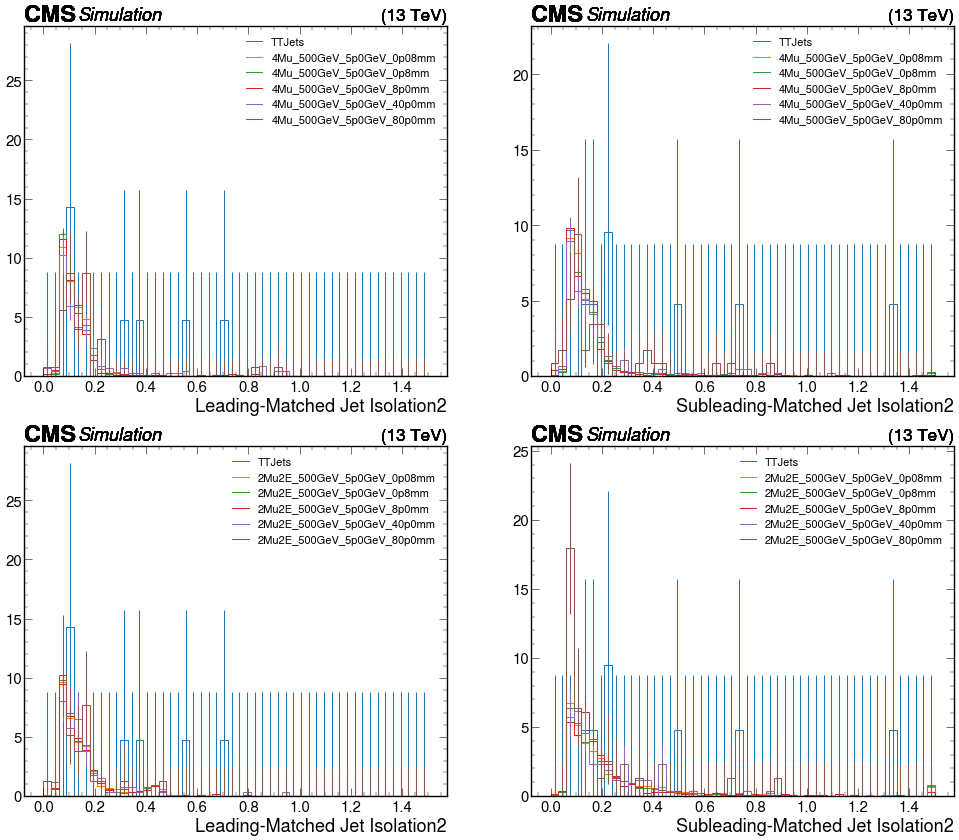

In [25]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

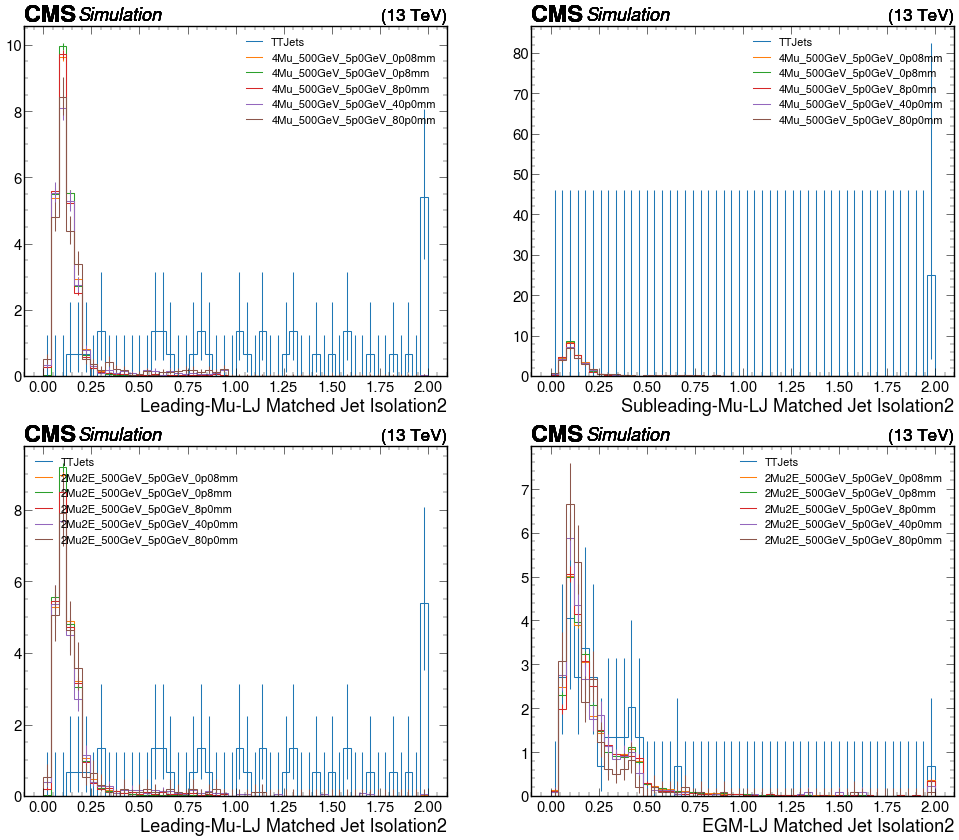

In [37]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

In [5]:
for sample in samples_4mu:
    print(sample, "Total LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total Mu-LJs'])
    print(sample, "Total EGM-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-Matched-Jets'])
    print("##############################")
    print("")

TTJets Total LJs 83
TTJets Total Mu-LJs 41
TTJets Total EGM-LJs 42

TTJets Total Matched-Jets 82
TTJets Total Leading-Mu-Matched-Jets 39
TTJets Total Subleading-Mu-Matched-Jets 2
TTJets Total EGM-Matched-Jets 39
##############################

4Mu_500GeV_5p0GeV_0p08mm Total LJs 93453
4Mu_500GeV_5p0GeV_0p08mm Total Mu-LJs 93401
4Mu_500GeV_5p0GeV_0p08mm Total EGM-LJs 52

4Mu_500GeV_5p0GeV_0p08mm Total Matched-Jets 93403
4Mu_500GeV_5p0GeV_0p08mm Total Leading-Mu-Matched-Jets 46701
4Mu_500GeV_5p0GeV_0p08mm Total Subleading-Mu-Matched-Jets 46697
4Mu_500GeV_5p0GeV_0p08mm Total EGM-Matched-Jets 52
##############################

4Mu_500GeV_5p0GeV_0p8mm Total LJs 87836
4Mu_500GeV_5p0GeV_0p8mm Total Mu-LJs 87794
4Mu_500GeV_5p0GeV_0p8mm Total EGM-LJs 42

4Mu_500GeV_5p0GeV_0p8mm Total Matched-Jets 87793
4Mu_500GeV_5p0GeV_0p8mm Total Leading-Mu-Matched-Jets 43895
4Mu_500GeV_5p0GeV_0p8mm Total Subleading-Mu-Matched-Jets 43893
4Mu_500GeV_5p0GeV_0p8mm Total EGM-Matched-Jets 42
#######################

In [6]:
for sample in samples_2mu:
    print(sample, "Total LJs", out_2mu[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_2mu[sample]["counters"]["0.4"]['base']['Total Mu-LJs'])
    print(sample, "Total EGM-LJs", out_2mu[sample]["counters"]["0.4"]['base']['Total EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['Total Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['Total Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_2mu[sample]["counters"]["0.4"]['base']['Total EGM-Matched-Jets'])
    print("##############################")
    print("")

TTJets Total LJs 83
TTJets Total Mu-LJs 41
TTJets Total EGM-LJs 42

TTJets Total Matched-Jets 82
TTJets Total Leading-Mu-Matched-Jets 39
TTJets Total Subleading-Mu-Matched-Jets 2
TTJets Total EGM-Matched-Jets 39
##############################

2Mu2E_500GeV_5p0GeV_0p08mm Total LJs 37070
2Mu2E_500GeV_5p0GeV_0p08mm Total Mu-LJs 18534
2Mu2E_500GeV_5p0GeV_0p08mm Total EGM-LJs 18536

2Mu2E_500GeV_5p0GeV_0p08mm Total Matched-Jets 37047
2Mu2E_500GeV_5p0GeV_0p08mm Total Leading-Mu-Matched-Jets 18523
2Mu2E_500GeV_5p0GeV_0p08mm Total Subleading-Mu-Matched-Jets 11
2Mu2E_500GeV_5p0GeV_0p08mm Total EGM-Matched-Jets 18516
##############################

2Mu2E_500GeV_5p0GeV_0p8mm Total LJs 30287
2Mu2E_500GeV_5p0GeV_0p8mm Total Mu-LJs 15135
2Mu2E_500GeV_5p0GeV_0p8mm Total EGM-LJs 15152

2Mu2E_500GeV_5p0GeV_0p8mm Total Matched-Jets 30266
2Mu2E_500GeV_5p0GeV_0p8mm Total Leading-Mu-Matched-Jets 15132
2Mu2E_500GeV_5p0GeV_0p8mm Total Subleading-Mu-Matched-Jets 3
2Mu2E_500GeV_5p0GeV_0p8mm Total EGM-Matched-J

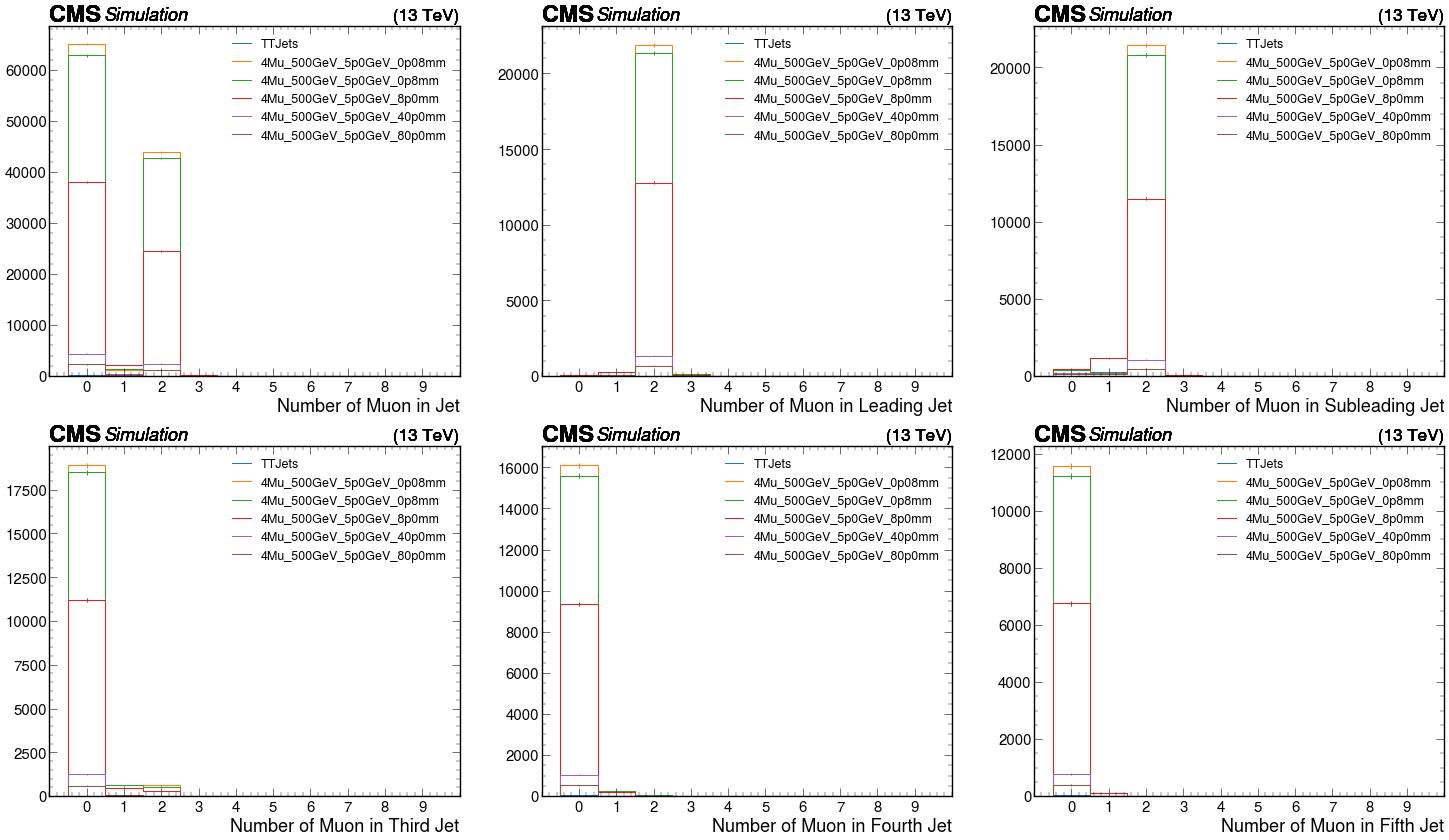

In [23]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet3_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet4_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet5_nmuon"][channels[0], :], density=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})